In [1]:
from __future__ import absolute_import, division, print_function

#!pip install -q tensorflow-gpu==2.0.0-alpha0
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, 
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print("Vovaulary size : {}".format(tokenizer.vocab_size))

Vovaulary size : 8185


In [6]:
sample_string = 'TensorFlow is cool.'

In [7]:
tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is {}".format(tokenized_string))

Tokenized string is [6307, 2327, 4043, 4265, 9, 2724, 7975]


In [8]:
original_string = tokenizer.decode(tokenized_string)
print("The original string is: {}".format(original_string))

The original string is: TensorFlow is cool.


In [9]:
assert original_string == sample_string

In [10]:
for ts in tokenized_string:
    print("{} -------------> {}".format(ts, tokenizer.decode([ts])))

6307 -------------> Ten
2327 -------------> sor
4043 -------------> Fl
4265 -------------> ow 
9 -------------> is 
2724 -------------> cool
7975 -------------> .


In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [12]:

train_dataset = train_dataset.padded_batch(BATCH_SIZE,(tf.TensorShape([None]), tf.TensorShape([])))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, (tf.TensorShape([None]), tf.TensorShape([])))

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0318 16:38:36.499185 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f177c6e2860>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0318 16:38:36.550676 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f177c6e2cc0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.


In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs=10, 
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 62s 158ms/step - loss: 0.5390 - accuracy: 0.7228 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 61s 156ms/step - loss: 0.4087 - accuracy: 0.8314 - val_loss: 0.6901 - val_accuracy: 0.5054
Epoch 3/10
391/391 [==============================] - 65s 167ms/step - loss: 0.5058 - accuracy: 0.7425 - val_loss: 0.4703 - val_accuracy: 0.7970
Epoch 4/10
391/391 [==============================] - 60s 155ms/step - loss: 0.3177 - accuracy: 0.8751 - val_loss: 0.4962 - val_accuracy: 0.7766
Epoch 5/10
391/391 [==============================] - 60s 154ms/step - loss: 0.2928 - accuracy: 0.8826 - val_loss: 0.5823 - val_accuracy: 0.8146
Epoch 6/10
391/391 [==============================] - 61s 156ms/step - loss: 0.2276 - accuracy: 0.9125 - val_loss: 0.5019 - val_accuracy: 0.8335
Epoch 7/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2101 - accuracy: 0.9224 - val_loss: 0.5892 

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 19s 49ms/step - loss: 0.6493 - accuracy: 0.7570Test Loss: 0.649314474343034
Test Accuracy: 0.7569599747657776


In [17]:
def pad_to_size(vec, size):
    zeros = [0]*(size - len(vec))
    vec.extend(zeros)
    return vec

In [18]:
def sample_predict(sentance, pad):
    tokenized_sample_pred_text = tokenizer.encode(sample_pred_text)
    
    if pad:
        tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)
    predctions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))
    
    return (predctions)
    

In [19]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')

In [21]:
predictions = sample_predict(sample_pred_text, pad=False)

In [22]:
print(predictions)

[[0.23808557]]


In [23]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.48437047]]


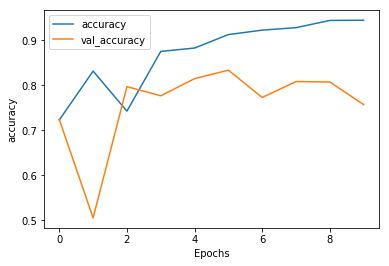

In [24]:
plot_graphs(history, 'accuracy')

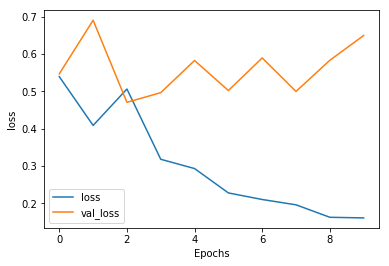

In [25]:
plot_graphs(history, 'loss')

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
    64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

W0318 19:13:57.448481 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f15cce60128>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0318 19:13:57.451181 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f15cce5e630>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0318 19:13:57.453751 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f15cce5eda0>: Note that this layer is not optimized for performance. Please use tf.keras.layers.CuDNNLSTM for better performance on GPU.
W0318 19:13:57.456034 139741283809088 tf_logging.py:161] <tensorflow.python.keras.layers.recurrent.UnifiedLSTM object at 0x7f15cce627f0>: Note that this layer is not optimized for performance. Please use tf.keras.laye

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_dataset, epochs=10, 
                    validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 152s 388ms/step - loss: 0.5440 - accuracy: 0.7233 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 133s 340ms/step - loss: 0.4388 - accuracy: 0.8023 - val_loss: 0.5371 - val_accuracy: 0.7326
Epoch 3/10
391/391 [==============================] - 123s 315ms/step - loss: 0.3796 - accuracy: 0.8426 - val_loss: 0.4552 - val_accuracy: 0.7976
Epoch 4/10
391/391 [==============================] - 139s 355ms/step - loss: 0.2768 - accuracy: 0.8933 - val_loss: 0.5026 - val_accuracy: 0.8144
Epoch 5/10
391/391 [==============================] - 125s 321ms/step - loss: 0.2144 - accuracy: 0.9207 - val_loss: 0.4964 - val_accuracy: 0.8077
Epoch 6/10
391/391 [==============================] - 121s 310ms/step - loss: 0.1942 - accuracy: 0.9274 - val_loss: 0.6134 - val_accuracy: 0.8161
Epoch 7/10
391/391 [==============================] - 122s 311ms/step - loss: 0.3599 - accuracy: 0.8373 - val_loss: 

In [29]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 42s 106ms/step - loss: 0.5875 - accuracy: 0.8369Test Loss: 0.5874873745395705
Test Accuracy: 0.8368800282478333


In [30]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.00601054]]


In [31]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.00230518]]


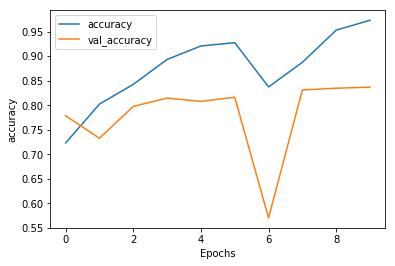

In [32]:
plot_graphs(history, 'accuracy')

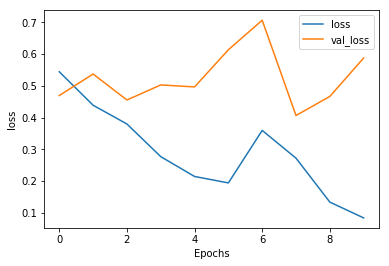

In [33]:
plot_graphs(history, 'loss')